In [1]:
import sys
sys.path.append("../")

In [2]:
CHECK_OPENCV2 = '/opt/ros/kinetic/lib/python2.7/dist-packages'
if CHECK_OPENCV2 in sys.path:
    sys.path.remove(CHECK_OPENCV2)

import numpy as np
import tensorflow as tf
from utils import network_placeholders, config_parser
from models.detector.detector import Detector
from models.loss import detection_loss as loss_fn
from data import dataloader
from cfg import config_reader

In [3]:
import cv2
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
np.set_printoptions(linewidth=500)

In [6]:
!realpath ../cfg/darknet.cfg

/home/karan/knapanda_local/playground/yolov3-tf2/cfg/darknet.cfg


In [7]:
model_config_file = "/home/karan/knapanda_local/playground/yolov3-tf2/cfg/darknet.cfg"
parsed_config = config_parser.parse(model_config_file)
#training_config = config_reader.reader("/home/karan/knapanda_local/playground/yolov3-tf2/cfg/config.json")
#train_dataset, validation_dataset = dataloader.tf_dataloader(training_config)

In [82]:
detection_model = Detector(parsed_config, 1)
detection_model = detection_model.build_model((416, 416, 3))
detection_model.layers[0].trainable = False

In [83]:
for layer in detection_model.layers:
    print(layer.name, layer.trainable)

input_2 False
leaky_convolution_72 leaky_conv
leaky_convolution_73 leaky_conv
leaky_convolution_74 leaky_conv
leaky_convolution_75 leaky_conv
add_23 True
leaky_convolution_76 leaky_conv
leaky_convolution_77 leaky_conv
leaky_convolution_78 leaky_conv
add_24 True
leaky_convolution_79 leaky_conv
leaky_convolution_80 leaky_conv
add_25 True
leaky_convolution_81 leaky_conv
leaky_convolution_82 leaky_conv
leaky_convolution_83 leaky_conv
add_26 True
leaky_convolution_84 leaky_conv
leaky_convolution_85 leaky_conv
add_27 True
leaky_convolution_86 leaky_conv
leaky_convolution_87 leaky_conv
add_28 True
leaky_convolution_88 leaky_conv
leaky_convolution_89 leaky_conv
add_29 True
leaky_convolution_90 leaky_conv
leaky_convolution_91 leaky_conv
add_30 True
leaky_convolution_92 leaky_conv
leaky_convolution_93 leaky_conv
add_31 True
leaky_convolution_94 leaky_conv
leaky_convolution_95 leaky_conv
add_32 True
leaky_convolution_96 leaky_conv
leaky_convolution_97 leaky_conv
add_33 True
leaky_convolution_98 l

In [84]:
latest_checkpoint_path = "/home/karan/Checkpoint/ckpt-49"
# latest_checkpoint_path = tf.train.latest_checkpoint("/home/karan/Checkpoint/")

In [5]:
if "":
    print("okay")

In [85]:
reader = tf.train.load_checkpoint(latest_checkpoint_path)

In [86]:
for k,v in reader.get_variable_to_shape_map().items():
    if '' in k:
        print(k, v)

save_counter/.ATTRIBUTES/VARIABLE_VALUE []
optimizer/iter/.ATTRIBUTES/VARIABLE_VALUE []
model/layer_with_weights-9/conv/kernel/.OPTIMIZER_SLOT/optimizer/v/.ATTRIBUTES/VARIABLE_VALUE [3, 3, 128, 256]
model/layer_with_weights-9/conv/kernel/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE [3, 3, 128, 256]
model/layer_with_weights-9/conv/kernel/.ATTRIBUTES/VARIABLE_VALUE [3, 3, 128, 256]
model/layer_with_weights-9/conv/bias/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE [256]
model/layer_with_weights-8/conv/bias/.ATTRIBUTES/VARIABLE_VALUE [128]
model/layer_with_weights-74/yolo_layer/kernel/.OPTIMIZER_SLOT/optimizer/v/.ATTRIBUTES/VARIABLE_VALUE [1, 1, 256, 18]
model/layer_with_weights-74/yolo_layer/kernel/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE [1, 1, 256, 18]
model/layer_with_weights-74/yolo_layer/kernel/.ATTRIBUTES/VARIABLE_VALUE [1, 1, 256, 18]
model/layer_with_weights-74/yolo_layer/bias/.ATTRIBUTES/VARIABLE_VALUE [18]
model/layer_with_weights-73/yolo_layer/k

In [87]:
reader.get_variable_to_shape_map()

{'save_counter/.ATTRIBUTES/VARIABLE_VALUE': [],
 'optimizer/iter/.ATTRIBUTES/VARIABLE_VALUE': [],
 'model/layer_with_weights-9/conv/kernel/.OPTIMIZER_SLOT/optimizer/v/.ATTRIBUTES/VARIABLE_VALUE': [3,
  3,
  128,
  256],
 'model/layer_with_weights-9/conv/kernel/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE': [3,
  3,
  128,
  256],
 'model/layer_with_weights-9/conv/kernel/.ATTRIBUTES/VARIABLE_VALUE': [3,
  3,
  128,
  256],
 'model/layer_with_weights-9/conv/bias/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE': [256],
 'model/layer_with_weights-8/conv/bias/.ATTRIBUTES/VARIABLE_VALUE': [128],
 'model/layer_with_weights-74/yolo_layer/kernel/.OPTIMIZER_SLOT/optimizer/v/.ATTRIBUTES/VARIABLE_VALUE': [1,
  1,
  256,
  18],
 'model/layer_with_weights-74/yolo_layer/kernel/.OPTIMIZER_SLOT/optimizer/m/.ATTRIBUTES/VARIABLE_VALUE': [1,
  1,
  256,
  18],
 'model/layer_with_weights-74/yolo_layer/kernel/.ATTRIBUTES/VARIABLE_VALUE': [1,
  1,
  256,
  18],
 'model/layer_with_weights-74/

In [88]:
# new_optimizer = tf.keras.optimizers.SGD()
checkpoint = tf.train.Checkpoint(model=detection_model)
checkpoint.restore(latest_checkpoint_path)

In [116]:
image = Image.open("../data/sample/dog2.jpg")
# image2 = Image.open("../data/sample/dog2.jpg")

In [117]:
resized_image = image.resize((416, 416),
                             PIL.Image.LANCZOS)
# resized_image2 = image2.resize((416, 416),
#                              PIL.Image.LANCZOS)

In [118]:
image_array = np.array(resized_image)
# image_array2 = np.array(resized_image2)

In [119]:
input_image = np.expand_dims(image_array, axis=0)
# input_image2 = np.expand_dims(image_array2/255, axis=0)

In [120]:
im = input_image
# im = np.concatenate([input_image, input_image2], axis=0)

In [121]:
input_tensor = tf.convert_to_tensor(im)/255

In [122]:
detection_results = detection_model(input_tensor, training=True)

In [123]:
detection_results[0].shape

TensorShape([1, 13, 13, 18])

In [124]:
detection_results[0][0, :2, :2, :]

<tf.Tensor: shape=(2, 2, 18), dtype=float32, numpy=
array([[[ 1.3922497e+00, -1.0897129e+00,  6.0543674e-01,  1.1139029e+00, -8.0652742e+00, -3.4675997e-01,  2.2771568e+00, -4.0749707e+00, -1.1341926e+00,  2.9761734e+00, -7.4328499e+00, -2.3238997e+00, -4.4800973e+00,  3.1553483e-01,  4.7160068e-01, -1.4908981e+00, -7.5594521e+00, -1.3971946e+00],
        [ 1.5779152e+00, -1.3682263e+00,  9.2858374e-01,  1.8156898e+00, -8.1933155e+00, -8.0519509e-01,  3.2938223e+00, -5.2453265e+00, -8.2732129e-01,  4.0723009e+00, -7.4018302e+00, -3.3772321e+00, -4.2792773e+00,  2.0898211e-01,  6.6421467e-01, -1.0254344e-03, -7.6174040e+00, -1.0352654e+00]],

       [[ 9.8531741e-01, -1.5705569e+00,  6.4604861e-01,  9.9652648e-01, -8.0231419e+00, -9.0698302e-01,  2.6570802e+00, -4.0179491e+00, -8.3063716e-01,  3.2722900e+00, -8.4629583e+00, -1.6462140e+00, -3.9868970e+00,  4.3101215e-01, -6.6947871e-01, -3.3116680e-02, -7.4509954e+00, -2.0605791e+00],
        [ 5.3628606e-01, -2.0126224e+00,  5.3721964e

In [125]:
# postprocess the detection_results
detection_result_1 = detection_results[0]
detection_result_2 = detection_results[1]
detection_result_3 = detection_results[2]

In [126]:
detection_result_1_r = tf.reshape(detection_result_1, [1, 3, 13, 13, 6])
detection_result_2_r = tf.reshape(detection_result_2, [1, 3, 26, 26, 6])
detection_result_3_r = tf.reshape(detection_result_3, [1, 3, 52, 52, 6])

# detection_result_1_r = tf.reshape(detection_result_1, [2, 3, 13, 13, 6])
# detection_result_2_r = tf.reshape(detection_result_2, [2, 3, 26, 26, 6])
# detection_result_3_r = tf.reshape(detection_result_3, [2, 3, 52, 52, 6])

In [127]:
det_1_bboxes = detection_result_1_r[:, :, :, :, :4]
det_1_objectness = detection_result_1_r[:, :, :, :, 4]
det_1_classes = detection_result_1_r[:, :, :, :, 5:]

In [128]:
grid_x_num = 13
grid_y_num = 13
batch_size = 1
anchor_size = 3

anchors_tensor = tf.constant(
#     [[10.0, 13.0], 
#      [16.0, 30.0], 
#      [33.0, 23.0]]
    
    [[116.0, 90.0],[156.0, 198.0],[373.0, 326.0]]
)

intermediate_center_x_offset = tf.broadcast_to(
    tf.range(grid_x_num, dtype=tf.float32),
    [grid_y_num, grid_x_num]
)   
center_x_offsets = tf.broadcast_to(
    intermediate_center_x_offset,
    [batch_size, anchor_size, grid_y_num, grid_x_num]
)   
intermediate_center_y_offset = tf.broadcast_to(
    tf.range(grid_y_num, dtype=tf.float32),
    [grid_x_num, grid_y_num]
)   
intermediate_center_y_offset = tf.transpose(intermediate_center_y_offset)
center_y_offsets = tf.broadcast_to(
    intermediate_center_y_offset,
    [batch_size, anchor_size, grid_y_num, grid_x_num]
)

def get_anchor_wh_offsets(w_index,
                          h_index,
                          anchors,
                          grid_x,
                          grid_y,
                          batch_size):
    anchor_size = anchors.shape[0]
    w_offsets = tf.broadcast_to(
        tf.expand_dims(
            tf.broadcast_to(
                tf.expand_dims(
                    tf.broadcast_to(
                        tf.expand_dims(anchors[:, w_index], axis=-1),
                        [anchor_size, grid_y]),
                    axis=-1),
                [anchor_size, grid_y, grid_x]),
            axis=0),
        [batch_size, anchor_size, grid_y, grid_x]
    )

    h_offsets = tf.broadcast_to(
        tf.expand_dims(
            tf.broadcast_to(
                tf.expand_dims(
                    tf.broadcast_to(
                        tf.expand_dims(anchors[:, h_index], axis=-1),
                        [anchor_size, grid_y]),
                    axis=-1),
                [anchor_size, grid_y, grid_x]),
            axis=0),
        [batch_size, anchor_size, grid_y, grid_x]
    )
    return w_offsets, h_offsets

In [129]:
w_offsets, h_offsets = get_anchor_wh_offsets(0,
                                             1,
                                             anchors_tensor,
                                             13,
                                             13,
                                             1)

In [130]:
det_1_x = det_1_bboxes[..., 0]
det_1_y = det_1_bboxes[..., 1] 
det_1_w = det_1_bboxes[..., 2]
det_1_h = det_1_bboxes[..., 3]

In [131]:
pred_1_x = (tf.math.sigmoid(det_1_x) + center_x_offsets) / grid_x_num
pred_1_y = (tf.math.sigmoid(det_1_y) + center_y_offsets) / grid_y_num
pred_1_w = (tf.exp(det_1_w) * w_offsets)/416
pred_1_h = (tf.exp(det_1_h) * h_offsets)/416

In [132]:
pred_objectness = tf.math.sigmoid(det_1_objectness)
pred_classes = tf.math.sigmoid(det_1_classes)

In [133]:
tf.where(pred_objectness > 0.5)

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[0, 1, 6, 4],
       [0, 1, 6, 9]])>

In [134]:
mask = tf.reshape(pred_objectness > 0.9, [1, 3, 13, 13])
# mask = tf.reshape(pred_classes > 0.9, [2, 3, 13, 13])

In [135]:
predicted_bboxes = tf.stack([pred_1_x, pred_1_y, pred_1_w, pred_1_h], axis=-1)

In [136]:
predicted_bboxes[0, 1, 6, 6]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5133474 , 0.5237587 , 0.422518  , 0.29268035], dtype=float32)>

In [137]:
bboxes = tf.boolean_mask(predicted_bboxes, mask)

In [138]:
bboxes_scaled = bboxes * 416

In [139]:
bboxes_np = tf.cast(bboxes_scaled, dtype=tf.int32).numpy()

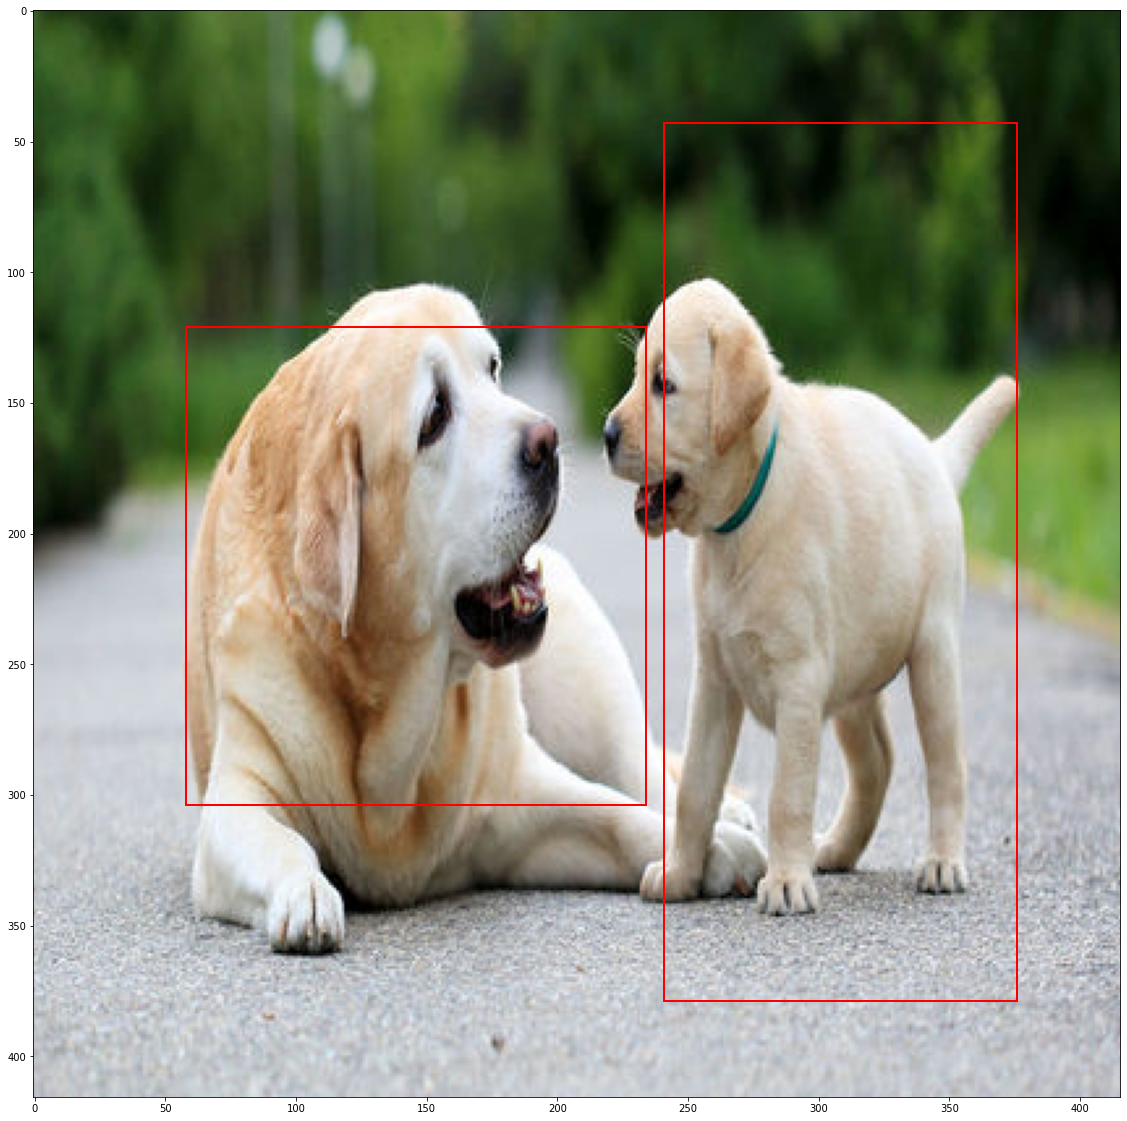

In [141]:
im = Image.open("/home/karan/knapanda_local/playground/yolov3-tf2/data/sample/dog2.jpg")
im = np.array(im, dtype=np.uint8)

fig,ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(im)

for box in bboxes_np:
    cx, cy, w, h = box
    x = int(cx-(w/2))
    y = int(cy-(h/2))
#     print(x, y, w, h)
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [76]:
objectness_heatmap = pred_objectness.numpy()

In [87]:
objectness_heatmap_anchor1 = np.array(objectness_heatmap[0][0, :, :] * 255, dtype=np.uint8)
objectness_heatmap_anchor2 = np.array(objectness_heatmap[0][1, :, :] * 255, dtype=np.uint8)
objectness_heatmap_anchor3 = np.array(objectness_heatmap[0][2, :, :] * 255, dtype=np.uint8)

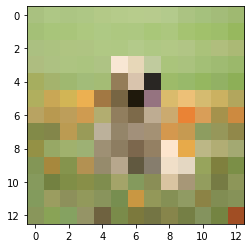

In [92]:
plt.imshow(cv2.resize(im, (13, 13)))

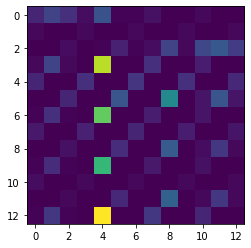

In [89]:
plt.imshow(objectness_heatmap_anchor1)